Saving AirPassengers.csv to AirPassengers (1).csv
Columns in dataset: Index(['Month', '#Passengers'], dtype='object')


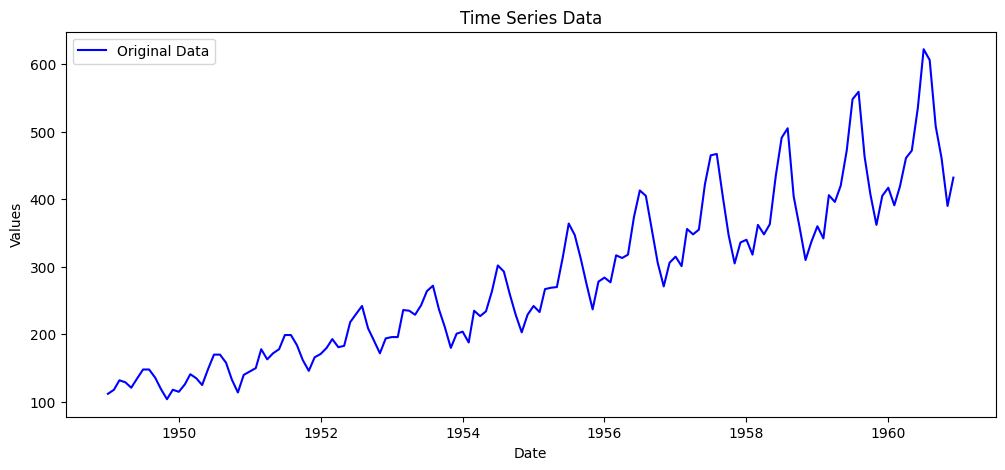


📌 ADF Statistic: 0.8153688792060528
📌 p-value: 0.9918802434376411
❌ Data is NOT Stationary (Apply Differencing)

📌 ADF Statistic: -2.829266824169999
📌 p-value: 0.05421329028382552
❌ Data is NOT Stationary (Apply Differencing)


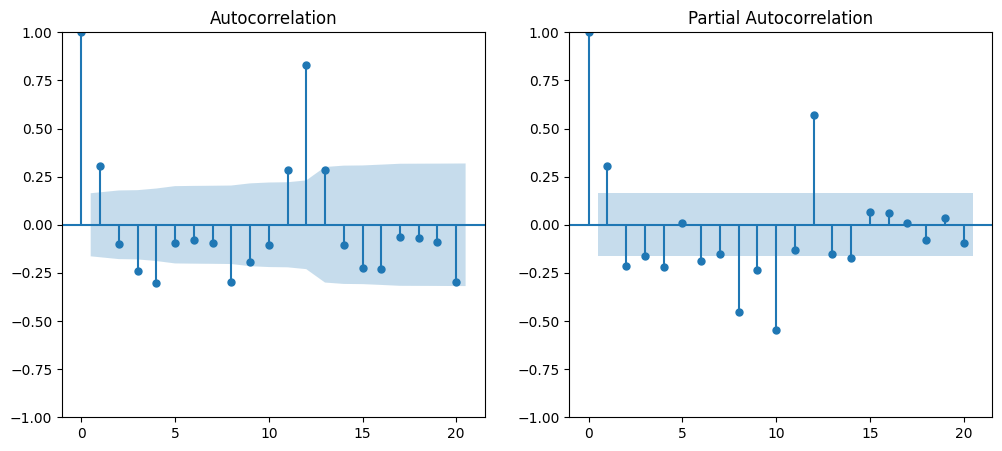

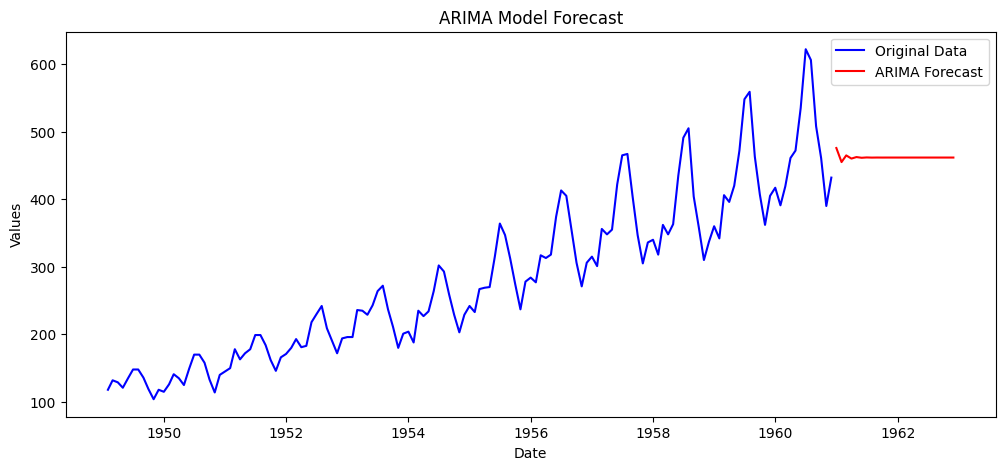

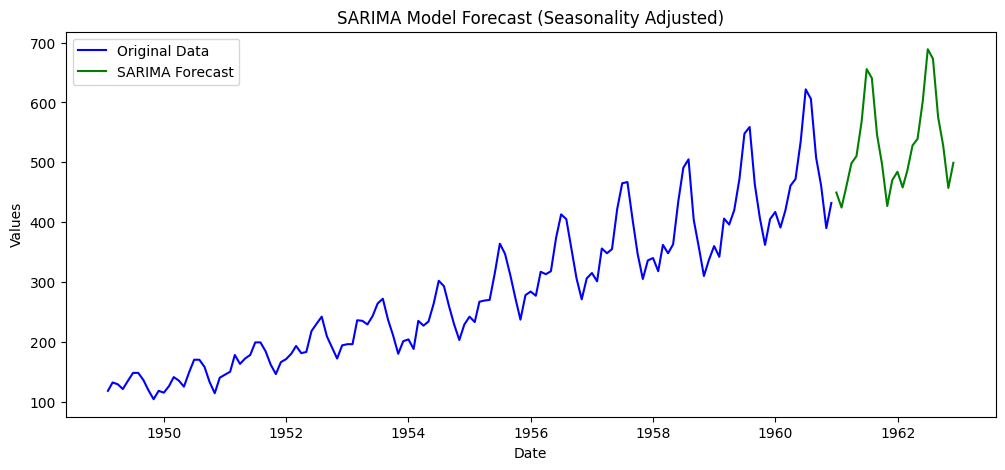

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# 📌 STEP 1: Load Dataset (With File Selection)
from google.colab import files
uploaded = files.upload()

# Get filename
file_name = list(uploaded.keys())[0]

# 📌 Check column names before parsing dates
df_temp = pd.read_csv(file_name)
print("Columns in dataset:", df_temp.columns)  # Find correct date column name

# 📌 Modify Date column name if needed
date_column = "Month"  # Change this based on the actual column name

# 📌 Load dataset with date parsing
df = pd.read_csv(file_name, parse_dates=[date_column], index_col=date_column)

# 📌 STEP 2: Visualize the Time Series Data
plt.figure(figsize=(12,5))
plt.plot(df, label="Original Data", color="blue")
plt.title("Time Series Data")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()

# 📌 STEP 3: Check for Stationarity (ADF Test)
def check_stationarity(series):
    result = adfuller(series.dropna())  # Drop NaN before test
    print(f"\n📌 ADF Statistic: {result[0]}")
    print(f"📌 p-value: {result[1]}")
    if result[1] < 0.05:
        print("✅ Data is Stationary (No Differencing Needed)")
    else:
        print("❌ Data is NOT Stationary (Apply Differencing)")

check_stationarity(df.iloc[:,0])  # Check first column

# 📌 STEP 4: Apply Differencing if needed
df['Diff'] = df.iloc[:,0].diff()  # First-order differencing
df.dropna(inplace=True)  # Drop NaN values

# Re-check stationarity after differencing
check_stationarity(df['Diff'])

# 📌 STEP 5: Plot ACF & PACF to Determine ARIMA Parameters
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_acf(df['Diff'], lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['Diff'], lags=20, ax=plt.gca())
plt.show()

# 📌 STEP 6: Train ARIMA Model
p, d, q = 1, 1, 1  # Based on ACF/PACF observations
arima_model = ARIMA(df.iloc[:,0], order=(p,d,q))
arima_result = arima_model.fit()

# 📌 STEP 7: Forecast Future Values with ARIMA
forecast_steps = 24
arima_forecast = arima_result.forecast(steps=forecast_steps)

# 📌 STEP 8: Train SARIMA Model (Handling Seasonality)
P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters (s=12 for monthly data)
sarima_model = SARIMAX(df.iloc[:,0], order=(p,d,q), seasonal_order=(P,D,Q,s))
sarima_result = sarima_model.fit()

# 📌 STEP 9: Forecast Future Values with SARIMA
sarima_forecast = sarima_result.forecast(steps=forecast_steps)

# 📌 STEP 10: Visualize ARIMA Forecast
plt.figure(figsize=(12,5))
plt.plot(df.index, df.iloc[:,0], label="Original Data", color="blue")
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps, freq='M'), arima_forecast, label="ARIMA Forecast", color="red")
plt.title("ARIMA Model Forecast")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()

# 📌 STEP 11: Visualize SARIMA Forecast
plt.figure(figsize=(12,5))
plt.plot(df.index, df.iloc[:,0], label="Original Data", color="blue")
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps, freq='M'), sarima_forecast, label="SARIMA Forecast", color="green")
plt.title("SARIMA Model Forecast (Seasonality Adjusted)")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()